# Import data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [29]:
# Load the MNIST dataset
(X_train_original, y_train), (X_test_full, y_test_full) = mnist.load_data()

In [30]:
X_test_original, X_val_original, y_test, y_val = train_test_split(
    X_test_full, y_test_full, test_size=0.5, random_state=42
)

print(f"Train: {X_train_original.shape}, Validation: {X_val_original.shape}, Test: {X_test_original.shape}")

Train: (60000, 28, 28), Validation: (5000, 28, 28), Test: (5000, 28, 28)


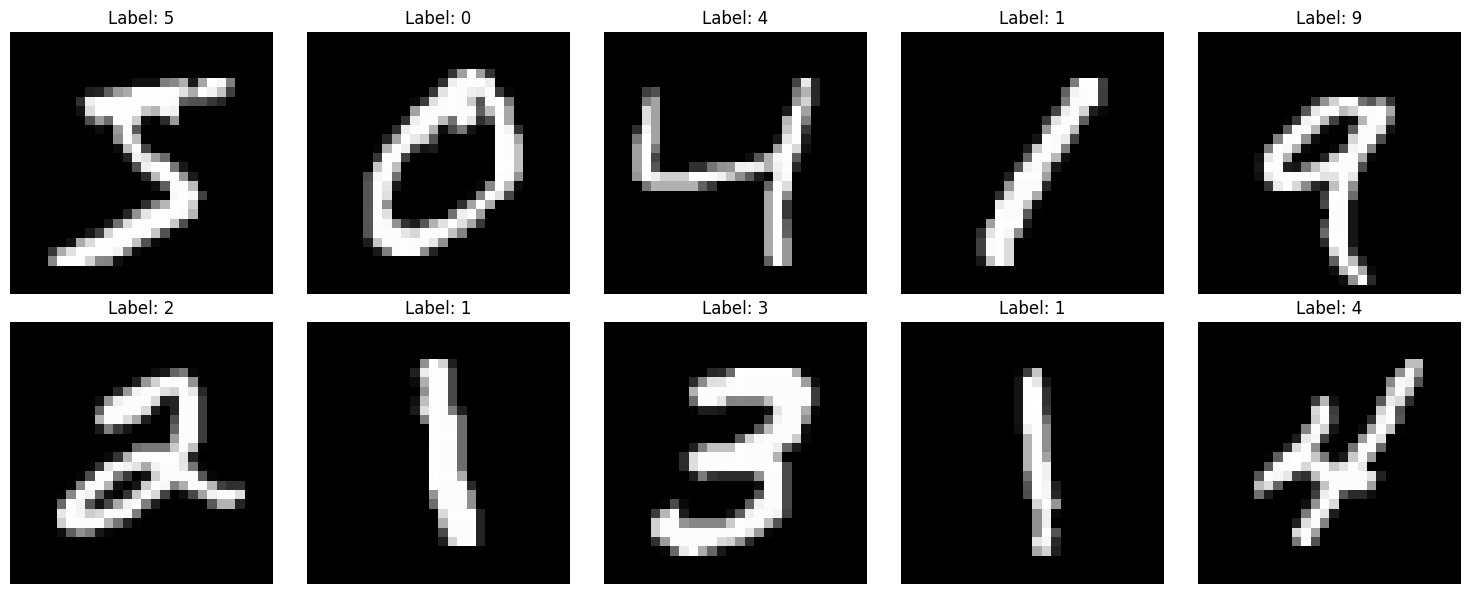

In [31]:
# Print 10 images
plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2, 5, i+1) 
    plt.imshow(X_train_original[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Train and test models

In [32]:
from wrapper.mnist_classifier import MnistClassifier

In [69]:
def pretty_eval(eval):
    print("Test metrics:\n")
    for field, value in eval.model_dump().items():
        if value is not None:
            if isinstance(value, np.ndarray):
                print(f"{field}:\n{value}")
            else:
                print(f"{field}: {value:.4f}" if isinstance(value, float) else f"{field}: {value}")

def print_misclassified(X_test, y_pred, y_test):
    misclassified_idx = np.where(y_pred != y_test)[0]

    np.random.seed(42)
    sample_idx = np.random.choice(misclassified_idx, size=9, replace=False)

    plt.figure(figsize=(5, 5))
    for i, idx in enumerate(sample_idx):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
        plt.title(f"True: {y_test[idx]} / Pred: {y_pred[idx]}")
        plt.axis("off")

    plt.suptitle("Misclassified MNIST examples", fontsize=16)
    plt.tight_layout()
    plt.show()

## Random Forest

In [34]:
X_test = X_test_original.reshape(X_test_original.shape[0], -1) 
X_train = X_train_original.reshape(X_train_original.shape[0], -1)  
X_val = X_val_original.reshape(X_val_original.shape[0], -1)  

In [35]:
from schemas.hyperparameter_validation import RFParams

In [37]:
hyperparams = RFParams(n_estimators=100,
                       random_state=42,
                       verbose=0)

rf_classifier = MnistClassifier(algorithm="rf", 
                                hyperparams=hyperparams)

rf_classifier.train(X_train=X_train,
                    y_train=y_train,
                    X_val=X_val,
                    y_val=y_val)
print("\n\n")
eval, y_pred = rf_classifier.evaluate(X_test, y_test)
pretty_eval(eval=eval)

Validation metrics:

accuracy: 0.9688
precision: 0.9686
recall: 0.9687
f1_score: 0.9686
confusion_matrix: 
[[490   0   0   0   0   3   0   0   1   0]
 [  0 556   1   0   0   1   2   0   1   0]
 [  4   0 506   3   3   0   1   5   2   0]
 [  0   0   6 504   0   6   0   5   2   0]
 [  0   0   0   0 481   0   4   0   3  13]
 [  0   0   0   6   0 405   2   1   1   0]
 [  8   1   0   0   1   3 479   0   2   0]
 [  1   1   9   2   0   0   0 477   0   6]
 [  3   0   4   1   3   1   1   2 459   6]
 [  2   2   1   7   6   1   0   5   1 487]]



Test metrics:

accuracy: 0.9694
precision: 0.9692
recall: 0.9691
f1_score: 0.9691
confusion_matrix:
[[481   0   0   0   0   0   2   1   2   0]
 [  0 571   1   2   0   0   0   0   0   0]
 [  3   0 489   3   0   1   3   4   5   0]
 [  1   0   6 465   0   3   0   4   6   2]
 [  1   0   0   0 471   0   1   1   2   5]
 [  4   0   1   7   2 453   2   1   4   3]
 [  0   2   0   0   2   2 455   0   3   0]
 [  0   2   9   1   0   0   0 513   2   5]
 [  2   0   2  

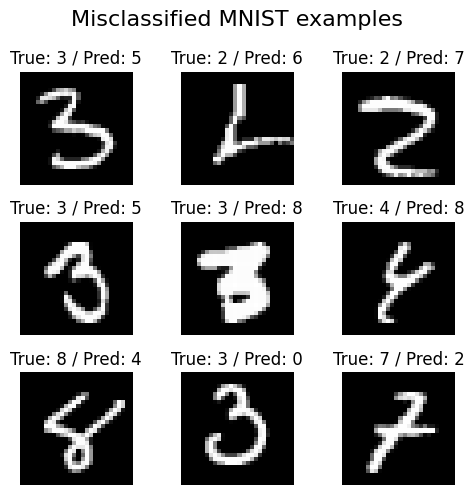

In [38]:
print_misclassified(X_test, y_pred, y_test)

In [39]:
# test with different hyperparams

hyperparams2 = RFParams(n_estimators=200,
                        random_state=42,
                        verbose=0)

rf_classifier2 = MnistClassifier(algorithm="rf", 
                                 hyperparams=hyperparams2)

rf_classifier2.train(X_train=X_train,
                     y_train=y_train,
                     X_val=X_val,
                     y_val=y_val)
print("\n\n")
eval2, y_pred2 = rf_classifier2.evaluate(X_test, y_test)
pretty_eval(eval=eval2)

Validation metrics:

accuracy: 0.9686
precision: 0.9685
recall: 0.9684
f1_score: 0.9684
confusion_matrix: 
[[490   0   0   0   0   2   0   0   1   1]
 [  0 554   1   0   0   2   2   0   1   1]
 [  4   0 508   2   3   0   1   4   2   0]
 [  0   0   4 509   0   3   0   5   2   0]
 [  0   0   1   0 484   0   3   0   2  11]
 [  0   0   0   8   0 402   2   1   1   1]
 [  7   1   0   0   2   2 480   0   2   0]
 [  1   1   9   3   1   0   0 476   0   5]
 [  2   0   4   4   2   2   1   2 456   7]
 [  2   2   1   7   7   3   0   5   1 484]]



Test metrics:

accuracy: 0.9698
precision: 0.9695
recall: 0.9695
f1_score: 0.9695
confusion_matrix:
[[481   0   0   0   0   0   2   1   2   0]
 [  0 570   1   3   0   0   0   0   0   0]
 [  2   0 492   2   0   1   3   4   4   0]
 [  1   0   6 466   0   2   0   4   6   2]
 [  1   0   0   0 470   0   1   1   2   6]
 [  3   0   1   7   3 453   3   1   5   1]
 [  0   2   1   0   1   2 456   0   2   0]
 [  0   2   9   0   0   0   0 514   3   4]
 [  2   0   2  

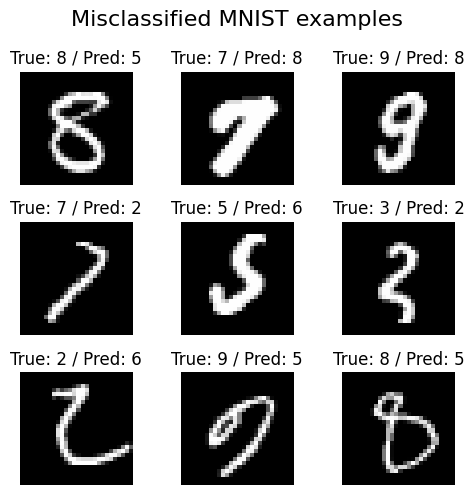

In [40]:
print_misclassified(X_test, y_pred2, y_test)

### Optional: find the best hyperparams using RandomizedSearchCV

This section performs hyperparameter tuning on the full X_train set using `RandomizedSearchCV`. 

- Distributions for hyperparameters such as `n_estimators`, and `max_depth` are defined.
- `RandomizedSearchCV` randomly selects combinations from these distributions and evaluates each using 3-fold cross-validation.
- Execution can require **several minutes to an hour** (ran ~7m on my machine) on typical CPUs, as the full training set (60,000 images) is utilized.

> For demonstration purposes, the results from a previous execution are displayed below. Re-execution of this cell is possible, but prolonged runtime is expected.

<details>
<summary>Click here to see results</summary>

Best hyperparameters: {'max_depth': 19, 'n_estimators': 156}  
Best CV score: 0.9648148148148148

Validation metrics:  

Accuracy: 0.9715  
Precision: 0.9715614790042484  
Recall: 0.9715  
F1 score: 0.9714934646812761  


Test metrics:  

Accuracy: 0.9693  
Precision: 0.9693093241546203  
Recall: 0.9693  
F1 score: 0.9692845248397367  
</details> 

In [13]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": randint(50, 200),
    "max_depth": randint(5, 20)
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,     
    cv=3,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

best_rf = random_search.best_estimator_
y_val_pred = best_rf.predict(X_val)

accuracy=accuracy_score(y_val, y_val_pred)
precision=precision_score(y_val, y_val_pred, average='weighted')
recall=recall_score(y_val, y_val_pred, average='weighted')
f1=f1_score(y_val, y_val_pred, average='weighted')
print("\nValidation metrics:")
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 score: {f1}")

print("\n")
y_test_pred = best_rf.predict(X_test)

accuracy=accuracy_score(y_test, y_test_pred)
precision=precision_score(y_test, y_test_pred, average='weighted')
recall=recall_score(y_test, y_test_pred, average='weighted')
f1=f1_score(y_test, y_test_pred, average='weighted')
print("Test metrics:\n")
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 score: {f1}")

Best hyperparameters: {'max_depth': 19, 'n_estimators': 156}
Best CV score: 0.9648148148148148

Validation metrics:
Accuracy: 0.9715
Precision: 0.9715614790042484
Recall0.9715
F1 score: 0.9714934646812761


Test metrics:

Accuracy: 0.9693
Precision: 0.9693093241546203
Recall0.9693
F1 score: 0.9692845248397367


### Key observations

- Accuracy consistently remained in the **~96–97% range** across all runs.  
- Increasing the number of estimators or performing hyperparameter tuning led to only **marginal gains**.  
- Confusion matrices showed typical MNIST misclassifications (such as visually similar digits), without dramatic shifts across settings.  
- Overall, Random Forest provided strong baseline performance on MNIST, though further improvements would likely require neural models (feed-forward or CNN).  

## Feed Forward Neural Network

In [41]:
X_test = X_test_original / 255
X_train = X_train_original / 255
X_val = X_val_original / 255

In [42]:
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (60000, 28, 28) y_train: (60000,)
X_val: (5000, 28, 28) y_val: (5000,)
X_test: (5000, 28, 28) y_test: (5000,)


In [43]:
from schemas.hyperparameter_validation import NNParams

In [44]:
nn_params = NNParams()
nn_params.model_dump()  # default params

{'input_shape': (28, 28),
 'hidden_units': [(128, 0.2), (64, 0.2)],
 'learning_rate': 0.001,
 'epochs': 10,
 'batch_size': 32,
 'random_state': 42}

In [45]:
ffnn_classifier = MnistClassifier('nn', nn_params)

In [46]:
ffnn_classifier.classifier.model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = ffnn_classifier.train(X_train, y_train, X_val, y_val)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8997 - loss: 0.3340 - val_accuracy: 0.9552 - val_loss: 0.1381
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9510 - loss: 0.1646 - val_accuracy: 0.9672 - val_loss: 0.1117
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.9610 - loss: 0.1295 - val_accuracy: 0.9730 - val_loss: 0.0910
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9670 - loss: 0.1084 - val_accuracy: 0.9724 - val_loss: 0.0929
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9705 - loss: 0.0951 - val_accuracy: 0.9762 - val_loss: 0.0845
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.9737 - loss: 0.0853 - val_accuracy: 0.9738 - val_loss: 0.0867
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9755 - loss: 0.0785 - val_accuracy: 0.9754 - val_loss: 0.0875
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9781 - loss: 0

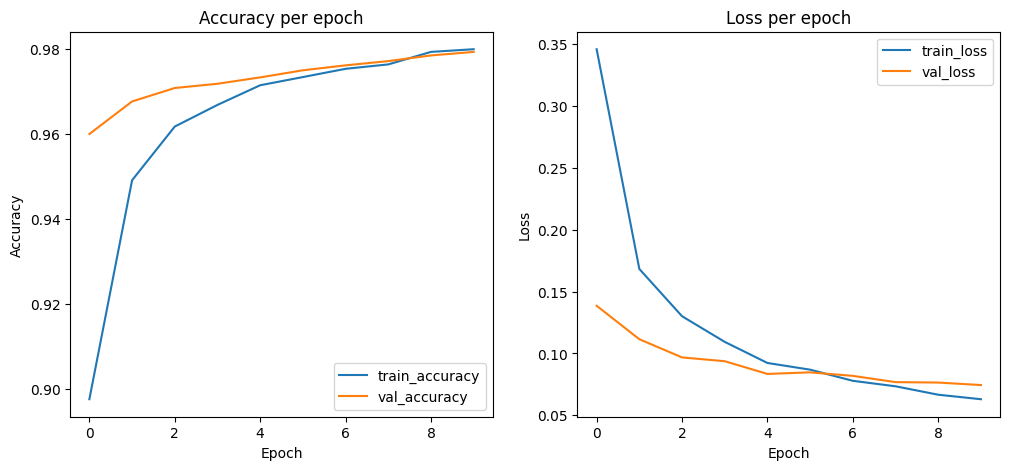

In [15]:
ffnn_classifier.classifier.plot_history()

In [64]:
metrics, y_pred = ffnn_classifier.evaluate(X_test, y_test)
pretty_eval(metrics)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Test metrics:

accuracy: 0.9798
precision: 0.9799
recall: 0.9797
f1_score: 0.9798
confusion_matrix:
[[475   1   2   0   0   1   5   2   0   0]
 [  0 563   2   2   0   0   1   4   2   0]
 [  0   0 499   3   0   0   1   4   1   0]
 [  0   0   1 477   0   1   0   2   2   4]
 [  0   0   1   0 471   0   2   3   0   4]
 [  2   0   0   2   2 464   3   0   1   3]
 [  0   2   0   1   0   2 458   0   1   0]
 [  1   1   3   0   0   0   0 525   0   2]
 [  2   0   1   5   1   2   1   3 479   0]
 [  1   1   0   1   1   0   0   5   0 488]]


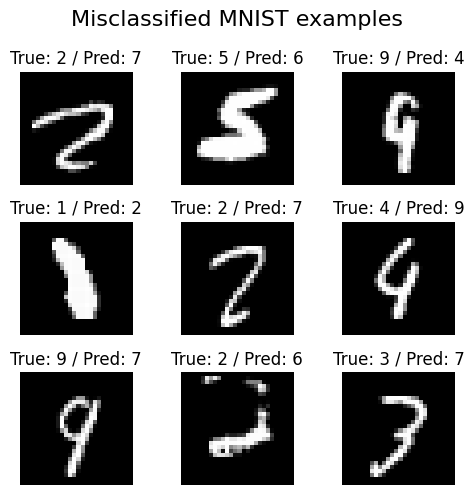

In [70]:
print_misclassified(X_test, y_pred, y_test)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4929 - loss: 1.4316 - val_accuracy: 0.8862 - val_loss: 0.4186
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8255 - loss: 0.5688 - val_accuracy: 0.9358 - val_loss: 0.2389
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8948 - loss: 0.3773 - val_accuracy: 0.9490 - val_loss: 0.1830
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9206 - loss: 0.2932 - val_accuracy: 0.9588 - val_loss: 0.1537
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9364 - loss: 0.2429 - val_accuracy: 0.9650 - val_loss: 0.1288
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9446 - loss: 0.2130 - val_accuracy: 0.9694 - val_loss: 0.1202
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9532 - loss: 0.1862 - val_accuracy: 0.9716 - val_loss: 0.1148
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9563 - loss: 0.1691 - 

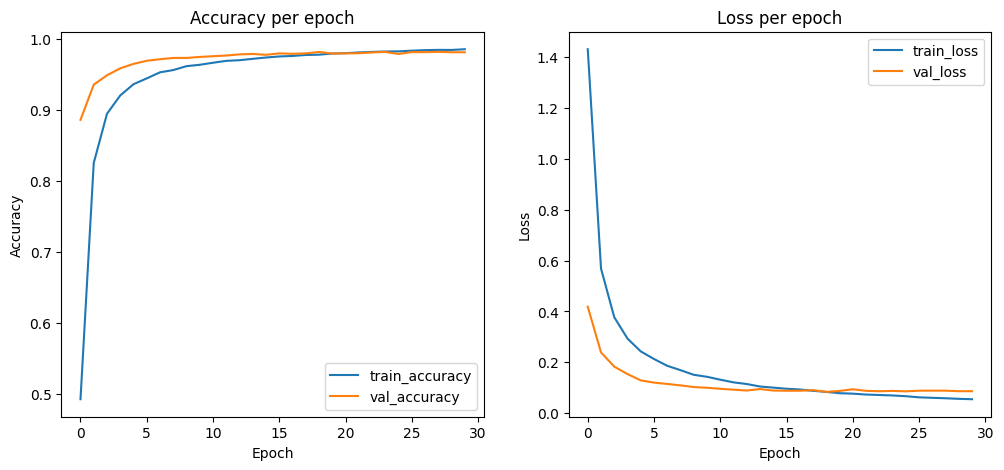

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step
Test metrics:

accuracy: 0.9856
precision: 0.9855
recall: 0.9855
f1_score: 0.9855
confusion_matrix:
[[481   0   0   0   1   0   2   1   1   0]
 [  0 567   2   1   0   0   1   0   3   0]
 [  0   0 503   0   0   0   1   3   1   0]
 [  0   0   1 478   0   2   0   2   1   3]
 [  0   0   0   0 476   0   1   1   0   3]
 [  2   0   0   1   0 467   2   1   3   1]
 [  0   2   0   1   0   2 457   0   2   0]
 [  0   0   3   0   0   0   0 525   1   3]
 [  2   0   1   2   1   3   0   1 484   0]
 [  2   1   0   1   3   0   0   0   0 490]]


In [ ]:
nn_params2 = NNParams(learning_rate=0.0001, 
                      epochs=30,
                      hidden_units=[(1000, 0.6),(256, 0.6),(128, 0.5), (64, 0.3)])

ffnn_classifier2 = MnistClassifier('nn', nn_params2)
ffnn_classifier2.train(X_train, y_train, X_val, y_val)

ffnn_classifier2.classifier.plot_history()

metrics2, y_pred2 = ffnn_classifier2.evaluate(X_test, y_test)
pretty_eval(metrics2)

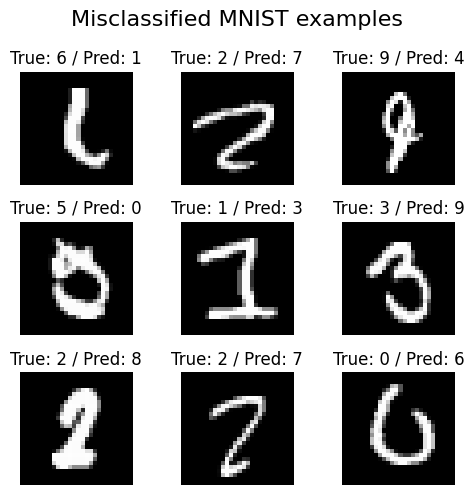

In [71]:
print_misclassified(X_test, y_pred2, y_test)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.4074 - loss: 1.6356 - val_accuracy: 0.8720 - val_loss: 0.5185
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7951 - loss: 0.6423 - val_accuracy: 0.9342 - val_loss: 0.2481
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8898 - loss: 0.3980 - val_accuracy: 0.9506 - val_loss: 0.1840
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9229 - loss: 0.2959 - val_accuracy: 0.9610 - val_loss: 0.1501
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9391 - loss: 0.2412 - val_accuracy: 0.9660 - val_loss: 0.1361
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9473 - loss: 0.2109 - val_accuracy: 0.9714 - val_loss: 0.1219
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9536 - loss: 0.1878 - val_accuracy: 0.9732 - val_loss: 0.1080
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9578 - loss

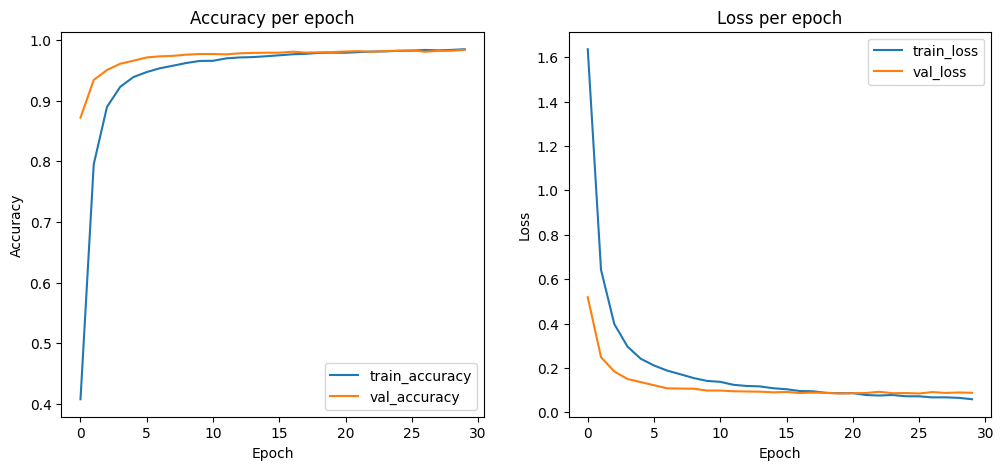

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test metrics:

accuracy: 0.9862
precision: 0.9862
recall: 0.9861
f1_score: 0.9861
confusion_matrix:
[[483   0   0   0   0   0   1   1   1   0]
 [  0 570   2   1   0   0   1   0   0   0]
 [  1   1 499   1   0   0   1   4   1   0]
 [  0   0   1 481   0   1   0   2   1   1]
 [  0   0   0   0 474   0   2   2   0   3]
 [  2   0   0   1   1 468   1   1   2   1]
 [  0   2   0   0   0   4 457   0   1   0]
 [  1   1   2   0   0   0   0 524   1   3]
 [  2   0   0   2   1   2   0   2 485   0]
 [  1   1   0   1   2   0   1   0   1 490]]


In [62]:
nn_params3 = NNParams(learning_rate=0.0001, 
                      epochs=30,
                      hidden_units=[(2000, 0.7), (1000, 0.6), (256, 0.6),(128, 0.5), (64, 0.3)])

ffnn_classifier3 = MnistClassifier('nn', nn_params3)
ffnn_classifier3.train(X_train, y_train, X_val, y_val)

ffnn_classifier3.classifier.plot_history()

metrics3, y_pred3 = ffnn_classifier3.evaluate(X_test, y_test)
pretty_eval(metrics3)

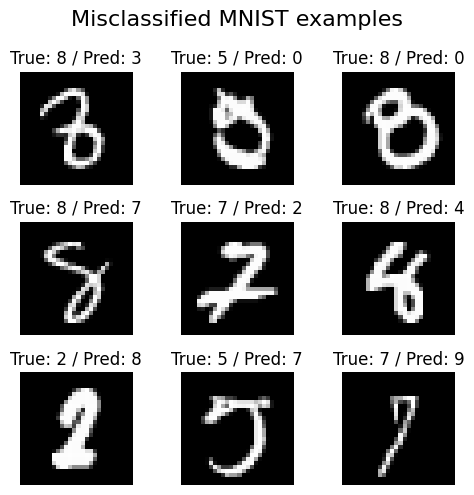

In [72]:
print_misclassified(X_test, y_pred3, y_test)

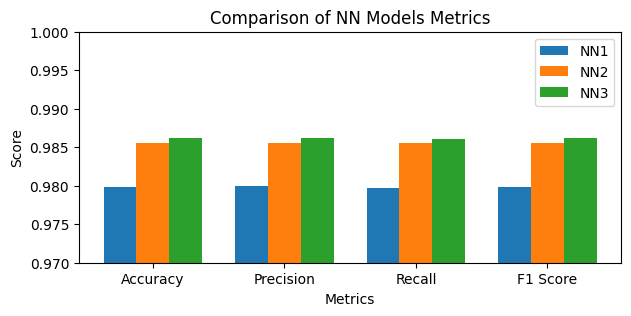

In [73]:
metrics_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
model_names = ["NN1", "NN2", "NN3"]

values = np.array([
    [metrics.accuracy, metrics.precision, metrics.recall, metrics.f1_score],
    [metrics2.accuracy, metrics2.precision, metrics2.recall, metrics2.f1_score],
    [metrics3.accuracy, metrics3.precision, metrics3.recall, metrics3.f1_score]
])

x = np.arange(len(metrics_names)) 
width = 0.25

fig, ax = plt.subplots(figsize=(7, 3))

for i in range(3):
    ax.bar(x + i*width, values[i], width, label=model_names[i])

ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Comparison of NN Models Metrics")
ax.set_xticks(x + width)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0.97, 1)
ax.legend()
plt.show()